In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
    
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [62]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
#percentage of women that survived 
women = train_data.loc[train_data.Sex == 'female']["Survived"]
per_alive_women = sum(women)/len(women)
print(per_alive_women*100,'%')

74.20382165605095 %


In [65]:
#percentage of men that survived 
men = train_data.loc[train_data.Sex == 'male']["Survived"]
per_alive_women = sum(men)/len(men)
print("Percentage of men who survived: ",per_alive_women*100,'%')

Percentage of men who survived:  18.890814558058924 %


In [66]:
y = train_data["Survived"]

In [67]:
train_data['train_test'] = 1 
test_data['train_test'] = 0
#This isn't used 
test_data['Survived'] = np.NaN

In [68]:
df_all = pd.concat([train_data, test_data], axis =0)
df_num = df_all[['Age','SibSp', 'Parch', 'Fare']]
df_cat = df_all[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
#This isn't used 
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [69]:
df_cat.Cabin 
#The number of cabins per passenger 
train_data['cabin_multiple']= train_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_data['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [70]:
pd.pivot_table(train_data,index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [71]:
#Creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category
train_data['cabin_adv'] = train_data.Cabin.apply(lambda x: str(x)[0])
test_data['cabin_adv'] = train_data.Cabin.apply(lambda x: str(x)[0])

In [72]:
#Isolating just their title from their name 
dataset_title = [i.split(',')[1].split('.')[0].strip() for i in train_data['Name']]
train_data['Title'] = pd.Series(dataset_title)
train_data['Title'].value_counts()
train_data['Title'] = train_data['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')

dataset_title = [i.split(',')[1].split('.')[0].strip() for i in test_data['Name']]
test_data['Title'] = pd.Series(dataset_title)
test_data['Title'].value_counts()
test_data['Title'] = test_data['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')

In [73]:
#Correlation between numeric tickets and survival 
train_data['numeric_ticket'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_data['ticket_letters'] = train_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
train_data['numeric_ticket'].value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [74]:
pd.set_option("display.max_rows", None)
train_data['ticket_letters'].value_counts()

ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64

In [75]:
train_data['name_title'] = train_data.Name.apply(lambda x: x.split('.')[1].split('.')[0].strip())

In [76]:
#Correlation between age and survival 
pd.pivot_table(train_data, index = 'Survived', columns = 'Age', values = 'Ticket', aggfunc= 'count')

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,2.0,7.0,1.0,3.0,NaN,...,2.0,NaN,2.0,3.0,1.0,2.0,1.0,2.0,1.0,NaN
1,1.0,1.0,2.0,2.0,1.0,5.0,3.0,5.0,7.0,4.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


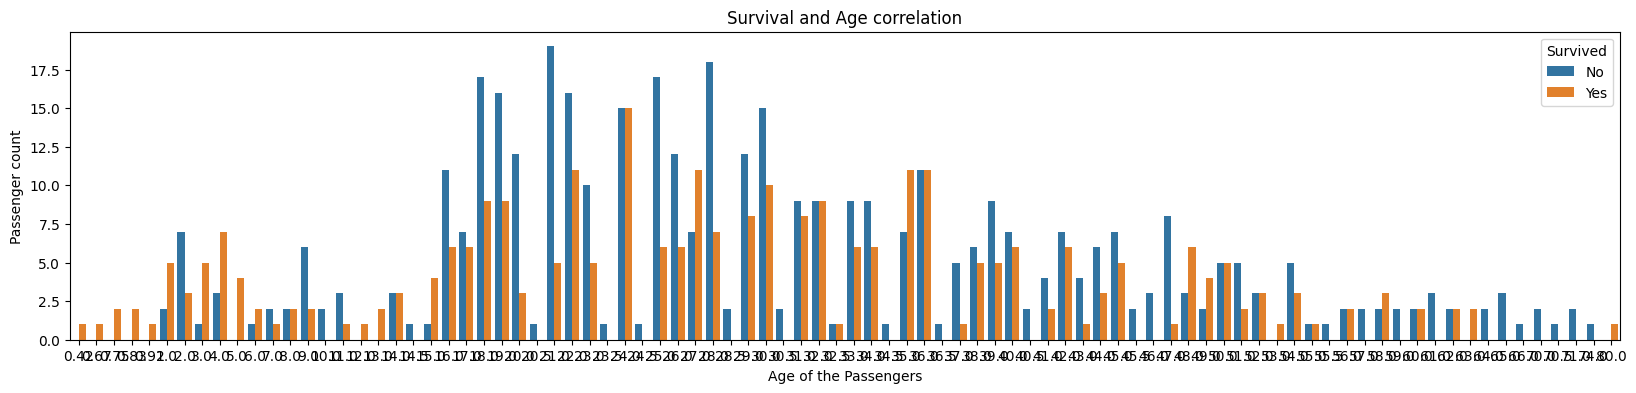

In [77]:
plt.figure(figsize=(20,4))

sns.countplot(x = 'Age', hue = 'Survived', data =train_data) 

plt.xlabel('Age of the Passengers')
plt.ylabel('Passenger count')
plt.title('Survival and Age correlation')
plt.legend(title='Survived', loc = 'upper right', labels = ['No', 'Yes'])

In [78]:
#Correlation between sex and survival 
pd.pivot_table(train_data, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc= 'count')

Sex,female,male
Survived,,
0,81,468
1,233,109


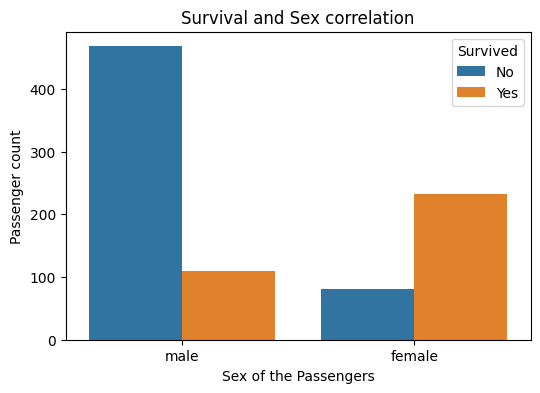

In [79]:
plt.figure(figsize=(6,4))

sns.countplot(x = 'Sex', hue = 'Survived', data =train_data) 

plt.xlabel('Sex of the Passengers')
plt.ylabel('Passenger count')
plt.title('Survival and Sex correlation')
plt.legend(title='Survived', loc = 'upper right', labels = ['No', 'Yes'])

In [80]:
#Mapping male and female to 1 and 0 respectively  
gender_mapping = {'male': 1, 'female': 0}
train_data['Sex'] = train_data['Sex'].map(gender_mapping)
test_data['Sex'] = test_data['Sex'].map(gender_mapping)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,Title,numeric_ticket,ticket_letters,name_title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,Mr,0,a5,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,Mrs,0,pc,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,Miss,0,stono2,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,1,C,Mrs,1,0,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,0,n,Mr,1,0,William Henry


In [81]:
#Correlation between sibsp and survival 
pd.pivot_table(train_data,index = 'Survived', columns = 'SibSp', values = 'Ticket', aggfunc = 'count')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


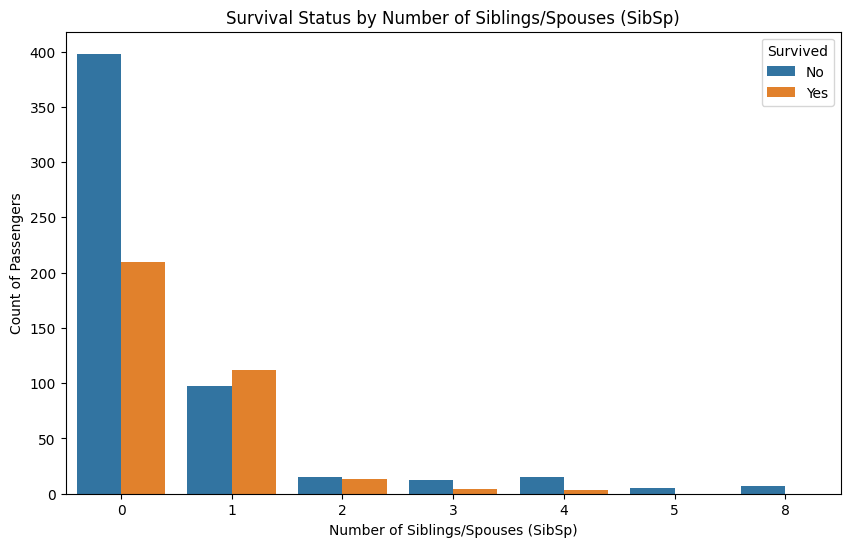

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=train_data)


plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Count of Passengers')
plt.title('Survival Status by Number of Siblings/Spouses (SibSp)')


plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])


plt.show()

In [83]:
pd.pivot_table(train_data, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


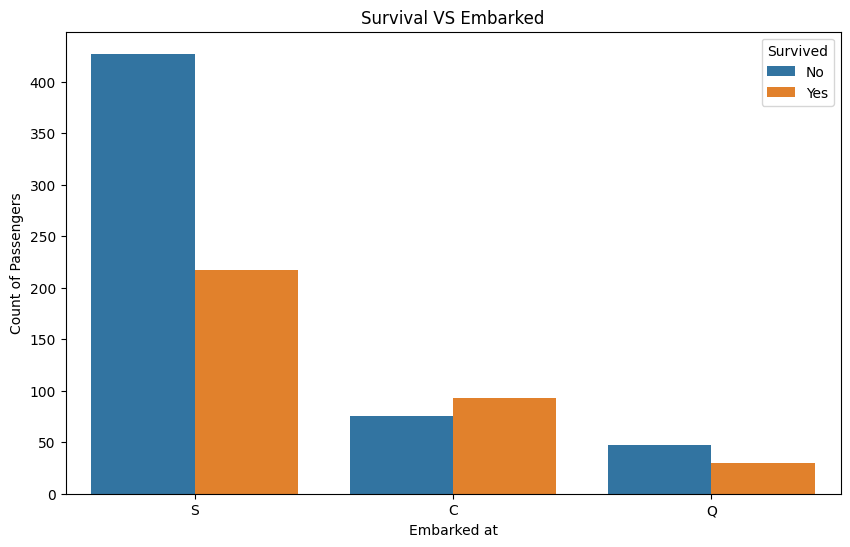

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Embarked', hue = "Survived", data = train_data)

plt.xlabel("Embarked at")
plt.ylabel('Count of Passengers')
plt.title('Survival VS Embarked')

plt.legend(title = 'Survived', loc = 'upper right', labels = ['No', 'Yes'])

plt.show()

In [85]:
#Correlation between Fare and survival 
pd.pivot_table(train_data,index = 'Survived', columns = 'Fare', values = 'Ticket', aggfunc = 'count')

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Survived,,,,,,,,,,,,,,,,,,,,,
0,14.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,2.0,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,3.0,NaN,NaN,3.0,1.0,2.0,2.0,3.0


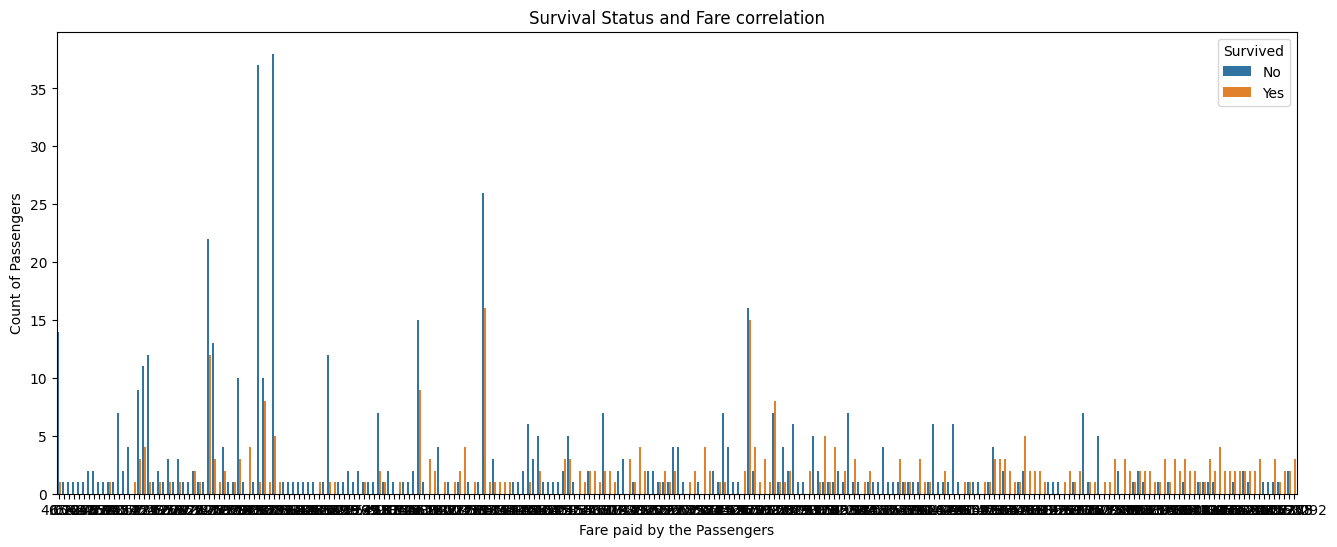

In [86]:
plt.figure(figsize = (16,6))
sns.countplot(x='Fare', hue= 'Survived', data = train_data)

plt.xlabel('Fare paid by the Passengers')
plt.ylabel('Count of Passengers')
plt.title('Survival Status and Fare correlation')

plt.legend(title = 'Survived', loc = 'upper right', labels=['No', 'Yes'])

plt.show()

In [87]:
#Mapping embarked to numbers 
embarked_mapping = {"S": 1, "Q": 2, "C": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

In [88]:
#Filling any NA data values in Embarked 
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace = True)

train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace = True)

In [89]:
print(train_data.columns)
print(test_data.columns)
train_data.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'cabin_multiple', 'cabin_adv', 'Title', 'numeric_ticket',
       'ticket_letters', 'name_title'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test', 'Survived',
       'cabin_adv', 'Title'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,Title,numeric_ticket,ticket_letters,name_title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,0,n,Mr,0,a5,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,3.0,1,1,C,Mrs,0,pc,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,1,0,n,Miss,0,stono2,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0,1,1,C,Mrs,1,0,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0,1,0,n,Mr,1,0,William Henry


In [90]:
#Dropping irrelevant columns 
train_data = train_data.drop(['Name','PassengerId','train_test', 'Cabin',
       'cabin_multiple', 'numeric_ticket','Ticket', 'ticket_letters',
       'name_title', 'Survived'], axis=1)
test_data_passengers = test_data['PassengerId']
test_data= test_data.drop(['Name','PassengerId','train_test', 'Ticket', 'Cabin', 'Survived'], axis=1)
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_adv,Title
0,3,1,22.0,1,0,7.2500,1.0,n,Mr
1,1,0,38.0,1,0,71.2833,3.0,C,Mrs
2,3,0,26.0,0,0,7.9250,1.0,n,Miss
3,1,0,35.0,1,0,53.1000,1.0,C,Mrs
4,3,1,35.0,0,0,8.0500,1.0,n,Mr


In [91]:
train_data.shape, y.shape, test_data.shape

((891, 9), (891,), (418, 9))

In [92]:
print(train_data.columns)
print(test_data.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'cabin_adv', 'Title'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'cabin_adv', 'Title'],
      dtype='object')


In [93]:
#Encoding cabin_adv and Title 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
labelencoder_X_1 = LabelEncoder() 
columns_toencode = ['cabin_adv', 'Title']

train_data[columns_toencode] = train_data[columns_toencode].apply(labelencoder_X_1.fit_transform)
test_data[columns_toencode] = test_data[columns_toencode].apply(labelencoder_X_1.fit_transform)

In [94]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_adv,Title
0,3,1,22.0,1,0,7.2500,1.0,8,2
1,1,0,38.0,1,0,71.2833,3.0,2,3
2,3,0,26.0,0,0,7.9250,1.0,8,1
3,1,0,35.0,1,0,53.1000,1.0,2,3
4,3,1,35.0,0,0,8.0500,1.0,8,2


In [95]:
#Computing the mean and standard deviation for each column 
mean = train_data.mean() 
std = train_data.mean()

#Normalize each column 
N_train_data = (train_data - mean)/std
N_test_data = (test_data - mean)/std

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(N_train_data, y, test_size = 0.25)

In [97]:
import torch 
from torch import nn 

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [98]:
import torch.nn.functional as F 

class TitanicPreds(nn.Module): 
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TitanicPreds, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim) 
        self.fc3 = nn.Linear(hidden_dim, 1) 
            
    def forward(self, x): 
        x = self.fc1(x) 
        x = F.dropout(x, p= 0.2)
        x = F.relu(x) 
        x = self.fc2(x) 
        x = F.relu(x) 
        x = self.fc3(x) 
#        x = F.sigmoid(x)
        return x
model_0 = TitanicPreds(9,16,1).to(device) 
print(model_0)

TitanicPreds(
  (fc1): Linear(in_features=9, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)


In [99]:
batch_size = 16
num_epochs = 300
learning_rate = 0.001 
batch_no = len(x_train)//batch_size 

In [100]:
loss_fn = nn.BCEWithLogitsLoss() 
#loss_fn = nn.BCELoss() 
optimizer = torch.optim.Adam(model_0.parameters(), lr = learning_rate)

In [101]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)
x_val= torch.tensor(x_val.values, dtype=torch.float32)
y_train =  torch.tensor(y_train.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)

In [102]:
from sklearn.metrics import accuracy_score
#accuracy = accuracy_score(y_true, y_pred)

In [103]:
from sklearn.utils import shuffle 
from torch.autograd import Variable 

n= 0
total_correct = 0
total_samples = 0
results_0 = {"train_loss": [], "train_acc": []} 
for epoch in range(num_epochs+1):

    x_train, y_train = shuffle(x_train, y_train)

    for i in range(batch_no): 
        start= i * batch_size 
        end = start + batch_size 
        
        x_var = torch.FloatTensor(x_train[start:end]).type(torch.float32).to(device)
        y_var = torch.FloatTensor(y_train[start:end]).view(-1, 1).type(torch.float32).to(device)

        optimizer.zero_grad() 
        ypred_var = model_0(x_var)
        loss = loss_fn(ypred_var, y_var)
        ypred_probabilities = torch.sigmoid(ypred_var)
        ypred_labels = (ypred_probabilities >= 0.5).type(torch.IntTensor)
        accuracy_sk = accuracy_score(y_var.cpu().numpy(), ypred_labels.cpu().numpy())
        results_0["train_loss"].append(loss)
        results_0["train_acc"].append(accuracy_sk)
        #print(f'Mini-Batch: {i + 1} | Loss: {loss:.5f} | Accuracy (Custom): {acc:.2f} | Accuracy (Sklearn): {accuracy_sk:.2f}')
        loss.backward() 
        optimizer.step()
    if epoch %5 == 0: 
        #epoch_accuracy = total_correct / total_samples
        print(f'Epoch: {epoch + 1} | Loss: {loss:.5f} | Accuracy = {accuracy_sk:.2f}')
    if epoch >= 100 and accuracy_sk >= 0.95 and loss < 0.2: 
        n += 1
        if n ==5: 
            print(f'Epoch: {epoch + 1} | Loss: {loss:.5f} | Accuracy = {accuracy_sk:.2f}')
            break

Epoch: 1 | Loss: 0.65401 | Accuracy = 0.88
Epoch: 6 | Loss: 0.54448 | Accuracy = 0.69
Epoch: 11 | Loss: 0.52297 | Accuracy = 0.81
Epoch: 16 | Loss: 0.65693 | Accuracy = 0.62
Epoch: 21 | Loss: 0.33902 | Accuracy = 0.94
Epoch: 26 | Loss: 0.49694 | Accuracy = 0.81
Epoch: 31 | Loss: 0.44476 | Accuracy = 0.81
Epoch: 36 | Loss: 0.48071 | Accuracy = 0.81
Epoch: 41 | Loss: 0.27801 | Accuracy = 0.88
Epoch: 46 | Loss: 0.48288 | Accuracy = 0.81
Epoch: 51 | Loss: 0.29033 | Accuracy = 0.88
Epoch: 56 | Loss: 0.41594 | Accuracy = 0.88
Epoch: 61 | Loss: 0.83768 | Accuracy = 0.62
Epoch: 66 | Loss: 0.55102 | Accuracy = 0.69
Epoch: 71 | Loss: 0.55498 | Accuracy = 0.69
Epoch: 76 | Loss: 0.56470 | Accuracy = 0.69
Epoch: 81 | Loss: 0.29480 | Accuracy = 0.88
Epoch: 86 | Loss: 0.39705 | Accuracy = 0.81
Epoch: 91 | Loss: 0.44648 | Accuracy = 0.81
Epoch: 96 | Loss: 0.47954 | Accuracy = 0.81
Epoch: 101 | Loss: 0.53634 | Accuracy = 0.69
Epoch: 106 | Loss: 0.37903 | Accuracy = 0.88
Epoch: 111 | Loss: 0.27735 | Acc

In [104]:
test_accuracy_set = []
test_loss_set = []
for instance in x_val:
    test_var = torch.FloatTensor(x_val).to(device)
    with torch.inference_mode():
        result = model_0(test_var).squeeze()
        
        result_probs = torch.sigmoid(result)
        result_labels = (result_probs >= 0.5).type(torch.IntTensor)
        accuracy_sk_val = accuracy_score(y_val.cpu().numpy(), result_labels.cpu().numpy())
        test_loss = loss_fn(result, y_val)
        test_accuracy_set.append(accuracy_sk)
        test_loss_set.append(test_loss)

print(f'Test loss: {test_loss} | Test Accuracy: {accuracy_sk_val}')


Test loss: 0.4299927055835724 | Test Accuracy: 0.8071748878923767


In [105]:
test_loss_set = np.array([tensor.item() for tensor in test_loss_set])
results_0['train_loss'] = np.array([tensor.item() for tensor in results_0['train_loss']])

In [106]:
results_0['train_acc'] = results_0['train_acc'][0::35]
test_accuracy_set = test_accuracy_set[0::35]

In [107]:
results_0['train_loss'] = results_0['train_loss'][0::25]
test_loss_set = test_loss_set[0::25]

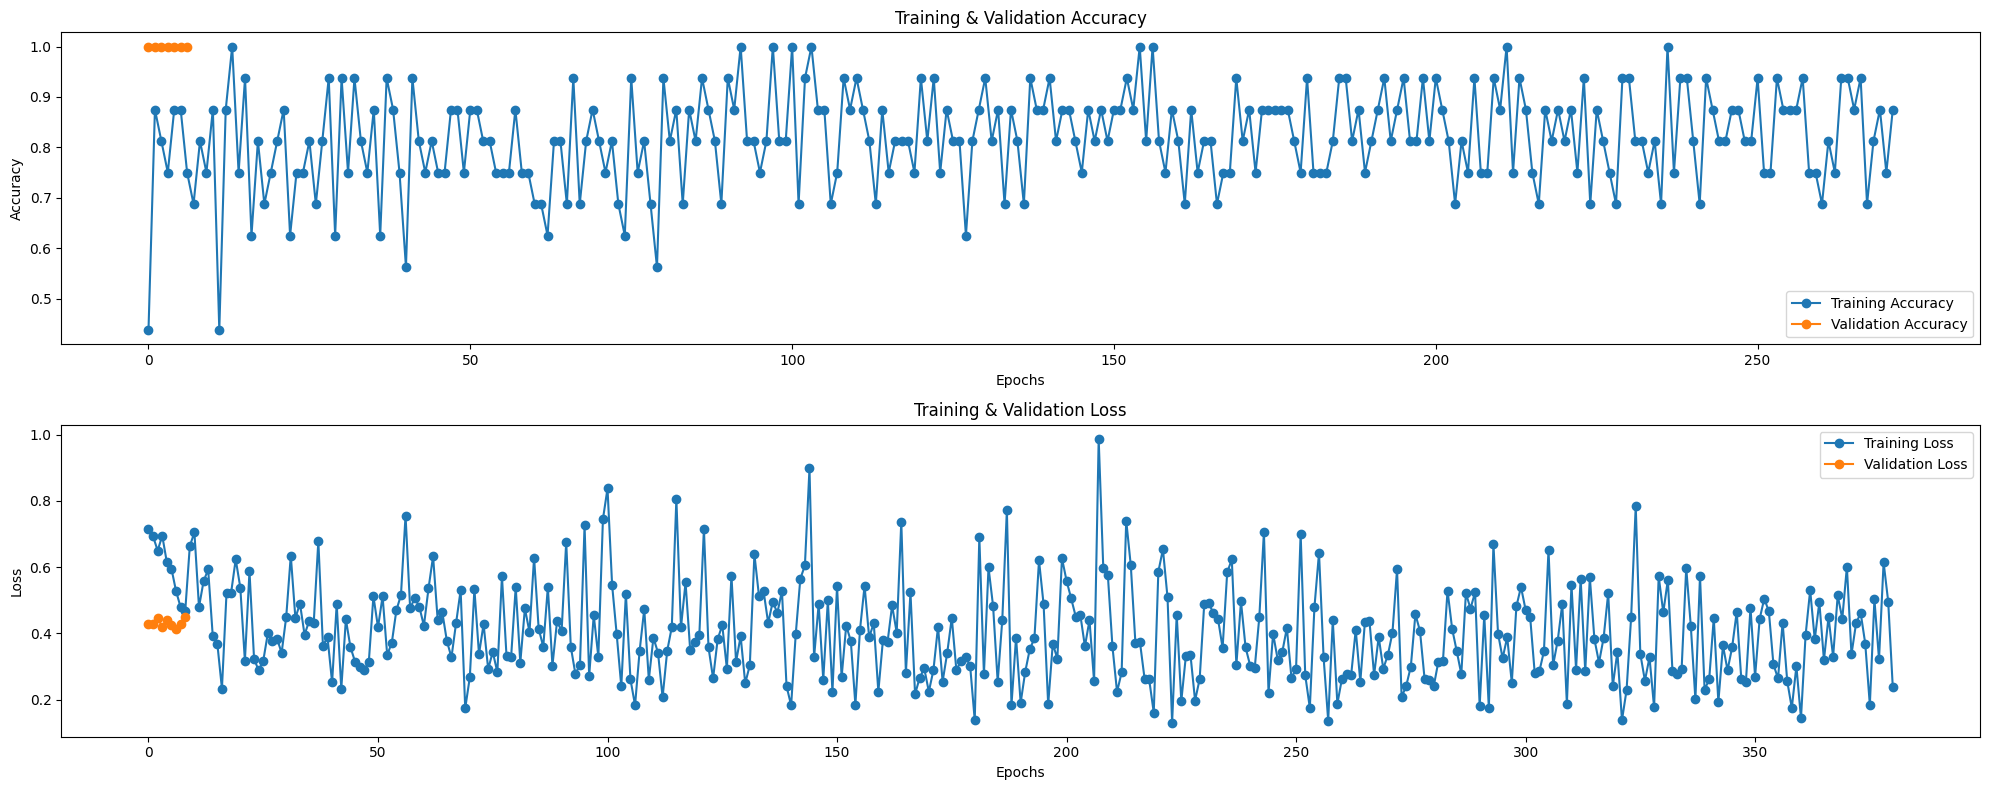

In [108]:
# Create subplots for accuracy and loss
plt.figure(figsize=(20, 8))

# Plot Training & Validation Accuracy
plt.subplot(2, 1, 1)
plt.plot(results_0['train_acc'], label='Training Accuracy', marker='o')
plt.plot(test_accuracy_set, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(2, 1, 2)
plt.plot(results_0['train_loss'], label='Training Loss', marker='o')
plt.plot(test_loss_set, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [109]:
testpd = pd.DataFrame(test_data)
testpd['PassengerID'] = test_data_passengers
test_data = torch.tensor(test_data.values, dtype = torch.float32)

In [110]:
test_data.shape

torch.Size([418, 9])

In [111]:
# for instance in test_data:
test_Fvar = Variable(torch.FloatTensor(test_data), requires_grad=True)
with torch.inference_mode():
    results = model_0(test_Fvar).squeeze()
        
    result_probs = torch.sigmoid(results)
    result_labels = (result_probs >= 0.5).type(torch.IntTensor)
survived = result_labels.data.numpy()


In [113]:
output = pd.DataFrame({'PassengerId': testpd.PassengerID, 'Survived': survived})
output.to_csv('submission.csv', index=False)